In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier

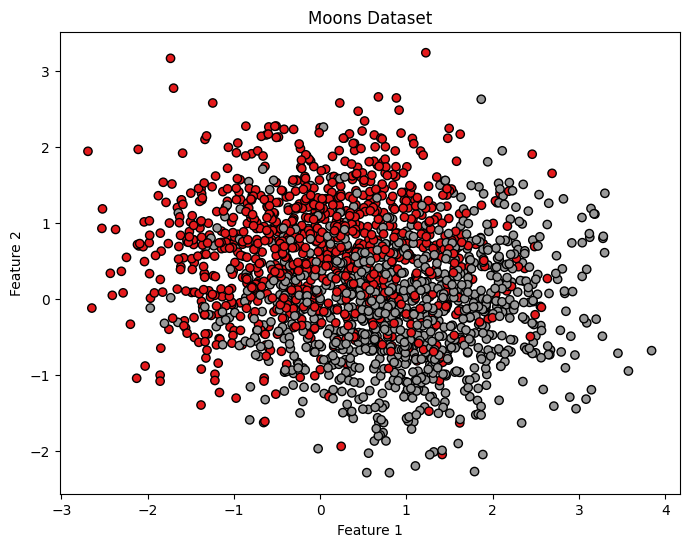

In [7]:
# Generate moons dataset with 1000 points per class (2000 total points)
X, y = make_moons(n_samples=2000, noise=0.70, random_state=42) # noise para cambiar el ruido de la data

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
# Split data into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
# Array of hidden layer sizes to try (you can modify this array)
hidden_layer_sizes_array = [(5,), (10,), (20,), (30,)]

# Prepare cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # n_splits para la cantidad de folds

# Lists to store mean and standard deviations of accuracy and AUC from cross-validation
mean_accuracy_list = []
std_accuracy_list = []
mean_auc_list = []
std_auc_list = []

# Lists to store accuracy and AUC on test set
test_accuracy_list = []
test_auc_list = []

# Store labels for plotting
hidden_layer_sizes_labels = [str(size[0]) for size in hidden_layer_sizes_array]

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, clf, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


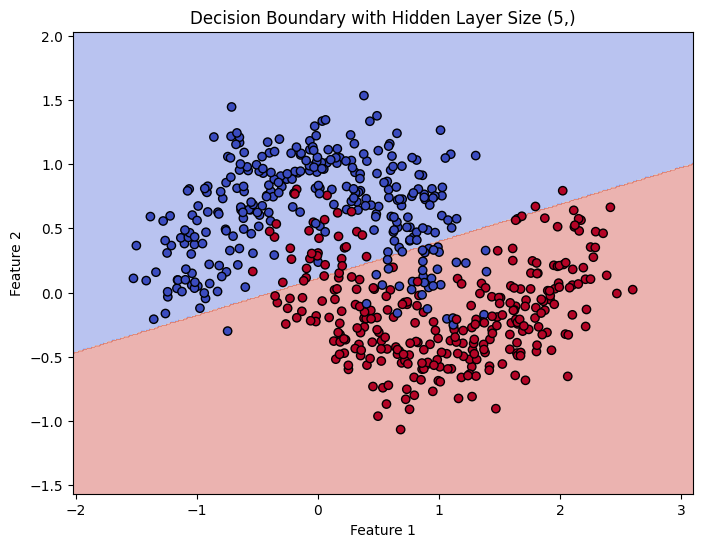

/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages

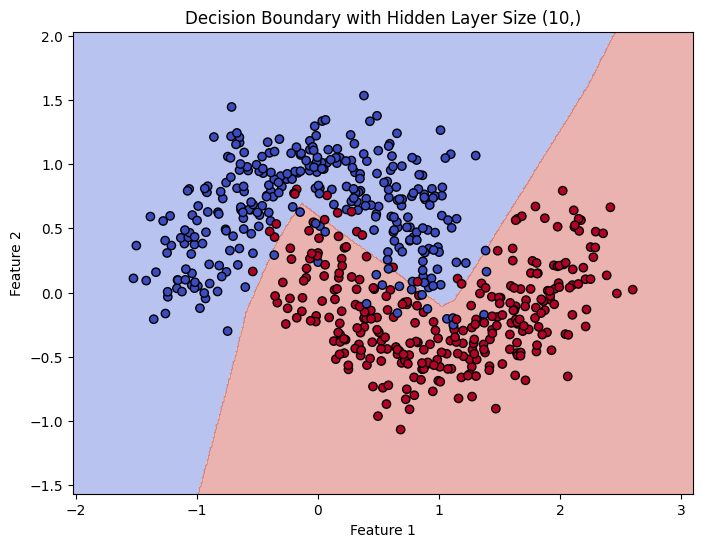

/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/albaro/.local/lib/python3.10/site-packages

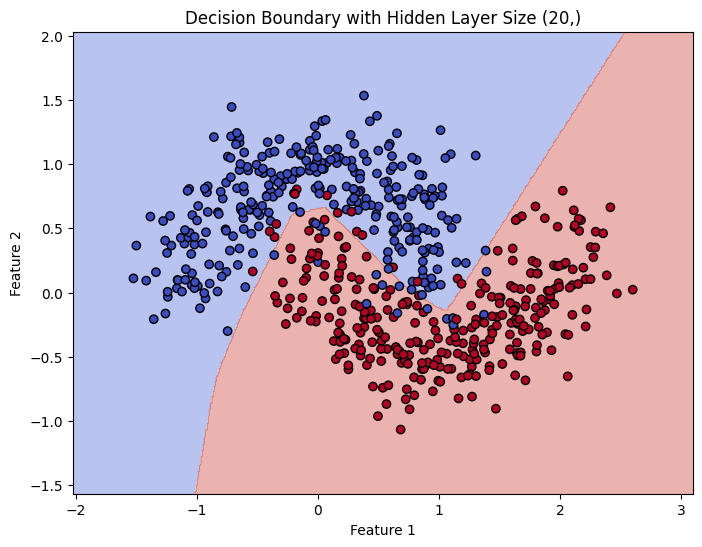

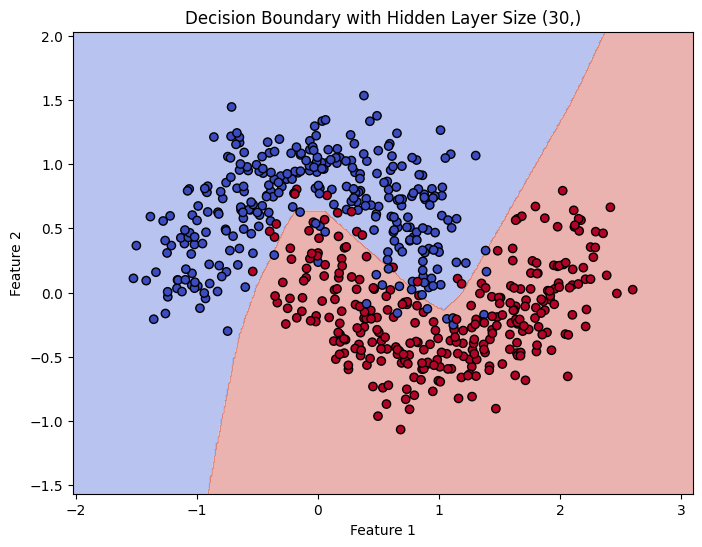

In [5]:
for hidden_layer_size in hidden_layer_sizes_array:
    accuracies = []
    aucs = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, random_state=42, max_iter=700) # max_iter cambia la cantidad max de iteraciones
    
    for train_index, test_index in cv.split(X_train, y_train):
        X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
        y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]
        
        # Fit the model
        mlp.fit(X_cv_train, y_cv_train)
        
        # Predict on test split
        y_pred = mlp.predict(X_cv_test)
        y_score = mlp.predict_proba(X_cv_test)[:, 1]
        
        # Compute accuracy
        acc = accuracy_score(y_cv_test, y_pred)
        accuracies.append(acc)
        
        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_cv_test, y_score)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # Interpolate TPR
        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)
    
    # Compute mean and std of accuracy and AUC from cross-validation
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    mean_accuracy_list.append(mean_accuracy)
    std_accuracy_list.append(std_accuracy)
    mean_auc_list.append(mean_auc)
    std_auc_list.append(std_auc)
    
    # Train the final model on all the training data
    mlp_final = MLPClassifier(hidden_layer_sizes=hidden_layer_size, random_state=42, max_iter=1000)
    mlp_final.fit(X_train, y_train)
    
    # Plot decision boundary on test data
    plot_decision_boundaries(X_test, y_test, mlp_final, title='Decision Boundary with Hidden Layer Size {}'.format(hidden_layer_size))
    
    # Evaluate mlp_final on test data
    y_test_pred = mlp_final.predict(X_test)
    y_test_score = mlp_final.predict_proba(X_test)[:, 1]
    test_accuracy = accuracy_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)
    test_auc = auc(fpr_test, tpr_test)
    
    # Store test accuracy and test AUC
    test_accuracy_list.append(test_accuracy)
    test_auc_list.append(test_auc)


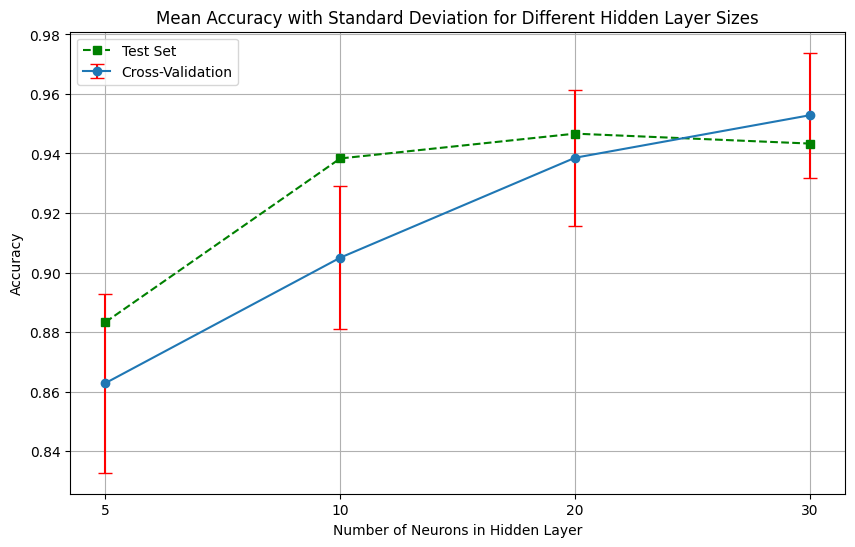

In [6]:
# Plot mean accuracy with standard deviation for each hidden layer size
plt.figure(figsize=(10,6))
plt.errorbar(hidden_layer_sizes_labels, mean_accuracy_list, yerr=std_accuracy_list, fmt='o-', capsize=5, ecolor='red', label='Cross-Validation')
plt.plot(hidden_layer_sizes_labels, test_accuracy_list, 's--', color='green', label='Test Set')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy with Standard Deviation for Different Hidden Layer Sizes')
plt.legend()
plt.grid(True)
plt.show()


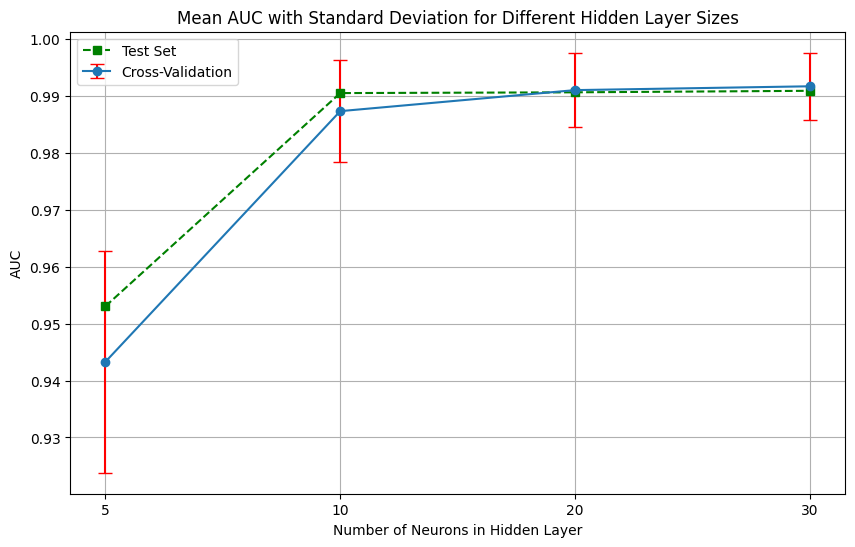

In [6]:
# Plot mean AUC with standard deviation for each hidden layer size
plt.figure(figsize=(10,6))
plt.errorbar(hidden_layer_sizes_labels, mean_auc_list, yerr=std_auc_list, fmt='o-', capsize=5, ecolor='red', label='Cross-Validation')
plt.plot(hidden_layer_sizes_labels, test_auc_list, 's--', color='green', label='Test Set')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('AUC')
plt.title('Mean AUC with Standard Deviation for Different Hidden Layer Sizes')
plt.legend()
plt.grid(True)
plt.show()
